In [6]:
import pandas as pd
import numpy as np
import re
import whois

In [ ]:
base_df = pd.read_csv('/Users/chrismclearnon/Developer/QUB-CSC3032-FYP/src/data/dataset.csv')
print(base_df)

In [ ]:
import datetime
from socket import *

def host_ft_extract(url):
    if not url:
        return
    
    feature_list = []
    url_dt = {}
    url_regex = '(?:http.*://)?(?P<host>[^:/ ]+).*'
    url_search = re.search(url_regex, url)
    hostname = url_search.group('host')

    try:
        domain = whois.whois(hostname)
    except whois.parser.PywhoisError:
        url_dt.update({
            "RegistryDate": pd.NaT,
            "ExpirationDate": pd.NaT,
            "HostCountry": None,
            "DomainAge": 0,
            "ExpYear": 0,
            "ExpMonth": 0,
            "ExpDay": 0
        })
        
        feature_list.append(url_dt)
        df = pd.DataFrame(feature_list)
        return df
    except timeout:
        url_dt.update({
            "RegistryDate": pd.NaT,
            "ExpirationDate": pd.NaT,
            "HostCountry": None,
            "DomainAge": 0,
            "ExpYear": 0,
            "ExpMonth": 0,
            "ExpDay": 0
        })
        
        feature_list.append(url_dt)
        df = pd.DataFrame(feature_list)
        
        return df
    except gaierror:
        url_dt.update({
            "RegistryDate": pd.NaT,
            "ExpirationDate": pd.NaT,
            "HostCountry": None,
            "DomainAge": 0,
            "ExpYear": 0,
            "ExpMonth": 0,
            "ExpDay": 0
        })
        
        feature_list.append(url_dt)
        df = pd.DataFrame(feature_list)
        
        return df
    except ConnectionResetError:
        url_dt.update({
            "RegistryDate": pd.NaT,
            "ExpirationDate": pd.NaT,
            "HostCountry": None,
            "DomainAge": 0,
            "ExpYear": 0,
            "ExpMonth": 0,
            "ExpDay": 0
        })
        
        feature_list.append(url_dt)
        df = pd.DataFrame(feature_list)
        
        return df
    except ConnectionRefusedError:
        url_dt.update({
            "RegistryDate": pd.NaT,
            "ExpirationDate": pd.NaT,
            "HostCountry": None,
            "DomainAge": 0,
            "ExpYear": 0,
            "ExpMonth": 0,
            "ExpDay": 0
        })
        
        feature_list.append(url_dt)
        df = pd.DataFrame(feature_list)
        
        return df
        
        
    reg_date = domain.creation_date
    if isinstance(reg_date, list):
        url_dt.update({"RegistryDate": reg_date[0]})
    elif (reg_date is None) or (reg_date == ""):
        url_dt.update({"RegistryDate": pd.NaT})
    else:
        try:
            url_dt.update({"RegistryDate": pd.to_datetime(reg_date)})
        except ValueError:
            url_dt.update({"RegistryDate": pd.NaT})

    exp_date = domain.expiration_date
    if isinstance(exp_date, list):
        url_dt.update({"ExpirationDate": exp_date[0]})
    elif (exp_date is None) or (exp_date == ""):
        url_dt.update({"ExpirationDate": pd.NaT})
    else:
        try:
            url_dt.update({"ExpirationDate": pd.to_datetime(exp_date)})
        except ValueError:
            url_dt.update({"ExpirationDate": pd.NaT})

    country = domain.country
    url_dt.update({"HostCountry": country})

    if pd.isnull(url_dt["RegistryDate"]):
        domain_age = 0
        url_dt.update({"DomainAge": domain_age})
    else:
        domain_age = datetime.datetime.now() - url_dt["RegistryDate"]
        age_in_days = domain_age.days
        url_dt.update({"DomainAge": age_in_days})

    feature_list.append(url_dt)
    df = pd.DataFrame(feature_list)
    if pd.isnull(df["ExpirationDate"].any):
        df["ExpYear"] = float("NaN")
        df["ExpMonth"] = float("NaN")
        df["ExpDay"] = float("NaN")
    else:
        df["ExpYear"] = df["ExpirationDate"].dt.year
        df["ExpMonth"] = df["ExpirationDate"].dt.month
        df["ExpDay"] = df["ExpirationDate"].dt.day
    
    return df

In [ ]:
dataframe_list = []
for idx, row in base_df.iterrows():
    print(row['URL'])
    feature_df = host_ft_extract(row['URL'])
    feature_df['URLType'] = row["URLType"]
    dataframe_list.append(feature_df)
    print(feature_df)
    
extracted_df = pd.DataFrame.concat(dataframe_list)
print(extracted_df)

In [ ]:
extracted_df = pd.concat(dataframe_list, ignore_index=True)
extracted_df.reset_index()
print(extracted_df)

In [ ]:
extracted_df.to_csv('/Users/chrismclearnon/Developer/QUB-CSC3032-FYP/src/data/domain_dataset.csv')

In [ ]:
extracted_df['URLType'].value_counts()

In [ ]:
benign_df = base_df[base_df.URLType.eq(0)]
benign_df = benign_df[:1000]
benign_df.reset_index()
display(benign_df)

In [ ]:
malicious_df = base_df[base_df.URLType.eq(1)]
malicious_df = malicious_df[:1000]
malicious_df.reset_index()

frames = [benign_df, malicious_df]
domain_df = pd.concat(frames)
domain_df = domain_df.sample(frac=1).reset_index(drop=True)
display(domain_df)

In [ ]:
domain_df["URLType"].value_counts()

In [ ]:
new_dataframe_list = []
for idx, row in domain_df.iterrows():
    print(row['URL'])
    feature_df = host_ft_extract(row['URL'])
    feature_df['URLType'] = row["URLType"]
    new_dataframe_list.append(feature_df)
    print(feature_df)
    
domain_ft_df = pd.DataFrame.concat(new_dataframe_list)
print(domain_ft_df)

In [ ]:
dmn_ft_df = pd.concat(new_dataframe_list).reset_index()
display(dmn_ft_df)

In [ ]:
dmn_ft_df.to_csv('/Users/chrismclearnon/Developer/QUB-CSC3032-FYP/src/data/domain_feature_dataset.csv')

In [ ]:
def replace_missing_values(df):
    default_reg = pd.to_datetime('2009-01-01 00:00:00')
    default_exp = pd.to_datetime('2020-08-01 00:00:00')
    domain_age = (datetime.datetime.now() - default_reg).days
    
    df['ExpYear'] = df.apply(
        lambda row: default_exp.year if (pd.isnull(row['ExpirationDate'])) else row['ExpYear'],
        axis=1
    )
    
    df['ExpMonth'] = df.apply(
        lambda row: default_exp.month if (pd.isnull(pd.to_datetime(row['ExpirationDate']))) else row['ExpMonth'],
        axis=1
    )
        
    df['ExpDay'] = df.apply(
        lambda row: default_exp.day if (pd.isnull(pd.to_datetime(row['ExpirationDate']))) else row['ExpDay'],
        axis=1
    )
    
    df['RegYear'] = df.apply(
        lambda row: default_reg.year if (pd.isnull(row['RegistryDate'])) else row['RegYear'],
        axis=1
    )
    
    df['RegMonth'] = df.apply(
        lambda row: default_reg.month if (pd.isnull(pd.to_datetime(row['RegistryDate']))) else row['RegMonth'],
        axis=1
    )
        
    df['RegDay'] = df.apply(
        lambda row: default_reg.day if (pd.isnull(pd.to_datetime(row['RegistryDate']))) else row['RegDay'],
        axis=1
    )
    
    df['DomainAge'] = df.apply(
        lambda row: domain_age if pd.isnull(pd.to_datetime(row['RegistryDate'])) else row['DomainAge'],
        axis=1
    )
    
    df['RegistryDate'] = df.apply(
        lambda row: default_reg if pd.isnull(pd.to_datetime(row['RegistryDate'])) else row['RegistryDate'],
        axis=1
    )
    
    df['ExpirationDate'] = df.apply(
        lambda row: default_exp if pd.isnull(pd.to_datetime(row['ExpirationDate'])) else row['ExpirationDate'],
        axis=1
    )

    df['HostCountry'] = df.apply(
        lambda row: 'US' if pd.isnull(row['HostCountry']) else row['HostCountry'],
        axis=1
    )

In [ ]:
new_df = pd.read_csv('/Users/chrismclearnon/Developer/QUB-CSC3032-FYP/src/data/domain_feature_dataset.csv', index_col=[0])
new_df.drop(['index'], axis=1, inplace=True)
display(new_df.columns)
new_df['RegistryDate'] = pd.to_datetime(new_df['RegistryDate'])
new_df['ExpirationDate'] = pd.to_datetime(new_df['ExpirationDate'])
print(new_df.dtypes)
    
replace_missing_values(new_df)
display(new_df)

In [ ]:
new_df.to_csv('/Users/chrismclearnon/Developer/QUB-CSC3032-FYP/src/data/domain_dataset_full.csv')

In [10]:
dataframe = pd.read_csv('/Users/chrismclearnon/Developer/QUB-CSC3032-FYP/src/data/domain_dataset_full.csv', index_col=[0])
display(dataframe)
X, Y = dataframe.drop(['URLType', 'ExpYear', 'ExpMonth', 'ExpDay'], axis=1), dataframe['URLType']
X['RegistryDate'] = pd.to_datetime(X['RegistryDate'])
X['ExpirationDate'] = pd.to_datetime(X['ExpirationDate'])
display(X.dtypes)
display(Y)

,RegistryDate,ExpirationDate,HostCountry,DomainAge,ExpYear,ExpMonth,ExpDay,URLType
0,2014-09-30 18:33:47,2020-09-30 18:33:47,CN,1992,2020.0,9.0,30.0,1
1,2005-07-19 14:50:34,2026-07-19 14:50:34,US,5352,2026.0,7.0,19.0,0
2,2016-08-08 18:53:41,2020-08-08 18:53:41,CN,1314,2020.0,8.0,8.0,1
3,2009-04-03 20:00:00,2020-04-03 21:00:00,US,3998,2020.0,4.0,3.0,0
4,2009-01-01 00:00:00,2020-08-01 00:00:00,US,4092,2009.0,8.0,1.0,0
...,...,...,...,...,...,...,...,...
1995,2008-08-02 19:06:27,2020-08-02 19:06:27,PA,4242,2020.0,8.0,2.0,0
1996,2009-01-01 00:00:00,2020-08-01 00:00:00,US,4092,2009.0,8.0,1.0,0
1997,2015-06-08 06:40:44,2020-06-08 06:40:44,US,1742,2020.0,6.0,8.0,1
1998,2009-01-01 00:00:00,2020-08-01 00:00:00,US,4092,2009.0,8.0,1.0,0


RegistryDate      datetime64[ns]
ExpirationDate    datetime64[ns]
HostCountry               object
DomainAge                  int64
dtype: object

0       1
1       0
2       1
3       0
4       0
       ..
1995    0
1996    0
1997    1
1998    0
1999    0
Name: URLType, Length: 2000, dtype: int64

In [12]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, RobustScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

class MissingValueImputer(TransformerMixin):
    def __init__(self, strategy, missing_values):
        self.missing_values = missing_values
        self.strategy = strategy
        self.imputer = SimpleImputer

    def fit(self, X, *_):
        self.imputer = self.imputer(missing_values=self.missing_values, strategy=self.strategy)
        self.imputer.fit(X)
        return self

    def transform(self, X, *_):
        transformed = self.imputer.transform(X)
        return transformed
    
class DateEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, col_names=[]):
        self.col_names = col_names

    def fit(self, *_):
        return self

    def transform(self, X):
        df_list = []
        for column in self.col_names:
            if pd.isna(X[column]).values.any():
                year_series = np.NaN
                month_series = np.NaN
                day_series = np.NaN
            else:
                dt = X[column].dt
                year_series = dt.year
                month_series = dt.month
                day_series = dt.day

            frame = {
                f'{column}_year': year_series,
                f'{column}_month': month_series,
                f'{column}_day': day_series
            }
            dt_df = pd.DataFrame.from_dict(frame)
            df_list.append(dt_df)

        df_list.append(X)
        dfs = pd.concat(df_list, axis=1)
        dfs = dfs.drop(self.col_names, axis=1)
        return dfs

class CategoryEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, handle_unknown='ignore', columns=[], has_fit=False, encoder=OneHotEncoder):
        self.handle_unknown = handle_unknown
        self.columns = columns
        self.encoder = encoder
        self.categories = []
        self.has_fit = has_fit

    def fit(self, X, *_):
        if self.has_fit:
            self.encoder = self.encoder(handle_unknown=self.handle_unknown, categories=categories)
            self.encoder.fit(X)
            return self
        else:
            self.encoder = self.encoder(handle_unknown=self.handle_unknown)
            self.encoder.fit(X)
            self.categories = self.encoder.categories_
            self.has_fit = True
            return self

    def transform(self, X, *_):
        encoded = self.encoder.transform(X)
        return encoded

class DomainFeatureScaler(BaseEstimator, TransformerMixin):
    def __init__(self, scaler=MinMaxScaler, has_fit=False, scaler_loc=""):
        self.scaler = scaler
        self.has_fit = has_fit
        self.scaler_loc = scaler_loc

    def fit(self, X, *_):
        if self.has_fit:
            self.scaler = deserialize(json_to_data(MinMaxScaler(), json_to_data("", self.scaler_loc)))
        else:
            self.scaler = self.scaler()
            self.scaler.fit(X)
            self.has_fit=True
        return self

    def transform(self, X, *_):
        scaled = self.scaler.transform(X)
        return scaled

In [13]:
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, make_scorer
from pickle import dump

date_encoder = DateEncoder(col_names=['RegistryDate', 'ExpirationDate'])
X = date_encoder.fit_transform(X)
display(X)

X_train, x_test, Y_train, y_test = train_test_split(X, Y, test_size = 0.33, random_state = 42)

encoder = CategoryEncoder(handle_unknown='ignore', columns=['HostCountry'])
t =[('categorial_encoder', encoder, ['HostCountry']),]
scaler = DomainFeatureScaler()
transformer = ColumnTransformer(t, remainder=scaler)
transformer.fit(X_train, Y_train)
X_train = transformer.transform(X_train)
x_test = transformer.transform(x_test)

display(X_train)
display(x_test)

model = SVC(kernel='rbf',C=100)
pipeline = Pipeline(steps=[('prep',transformer), ('m', model)])

cv = KFold(n_splits=10, shuffle=True, random_state=1)

def tn(y_true, y_pred): return confusion_matrix(y_true, y_pred)[0, 0]
def fp(y_true, y_pred): return confusion_matrix(y_true, y_pred)[0, 1]
def fn(y_true, y_pred): return confusion_matrix(y_true, y_pred)[1, 0]
def tp(y_true, y_pred): return confusion_matrix(y_true, y_pred)[1, 1]

def tnr(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    rate = (tn/(tn+fp))
    return rate

def tpr(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    rate = (tp/(tp+fn))
    return rate

def fnr(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    rate = (fn/(fn+tp))
    return rate

def fpr(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    rate = (fp/(fp+tn))
    return rate

scoring = {'tp': make_scorer(tp),
           'tn': make_scorer(tn),
           'fp': make_scorer(fp),
           'fn': make_scorer(fn),
           'tpr': make_scorer(tpr),
           'tnr': make_scorer(tnr),
           'fpr': make_scorer(fpr),
           'fnr': make_scorer(fnr),
}
scores = cross_validate(model, X_train, Y_train, scoring=scoring, cv=cv, n_jobs=-1)
model.fit(X_train, Y_train)

,RegistryDate_year,RegistryDate_month,RegistryDate_day,ExpirationDate_year,ExpirationDate_month,ExpirationDate_day,HostCountry,DomainAge
0,2014,9,30,2020,9,30,CN,1992
1,2005,7,19,2026,7,19,US,5352
2,2016,8,8,2020,8,8,CN,1314
3,2009,4,3,2020,4,3,US,3998
4,2009,1,1,2020,8,1,US,4092
...,...,...,...,...,...,...,...,...
1995,2008,8,2,2020,8,2,PA,4242
1996,2009,1,1,2020,8,1,US,4092
1997,2015,6,8,2020,6,8,US,1742
1998,2009,1,1,2020,8,1,US,4092


<1340x37 sparse matrix of type '<class 'numpy.float64'>'
	with 9259 stored elements in Compressed Sparse Row format>

<660x37 sparse matrix of type '<class 'numpy.float64'>'
	with 4609 stored elements in Compressed Sparse Row format>

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [20]:
import json
import collections
import scipy

def isnamedtuple(obj):
    """Heuristic check if an object is a namedtuple."""
    return isinstance(obj, tuple) \
           and hasattr(obj, "_fields") \
           and hasattr(obj, "_asdict") \
           and callable(obj._asdict)
        
def serialize(data):
    if data is None or isinstance(data, (bool, int, float, str)):
        return data
    if isinstance(data, list):
        return [serialize(val) for val in data]
    if isinstance(data, collections.OrderedDict):
        return {"py/collections.OrderedDict":
                [[serialize(k), serialize(v)] for k, v in data.iteritems()]}
    if isnamedtuple(data):
        return {"py/collections.namedtuple": {
            "type":   type(data).__name__,
            "fields": list(data._fields),
            "values": [serialize(getattr(data, f)) for f in data._fields]}}
    if isinstance(data, dict):
        if all(isinstance(k, str) for k in data):
            return {k: serialize(v) for k, v in data.items()}
        return {"py/dict": [[serialize(k), serialize(v)] for k, v in data.items()]}
    if isinstance(data, tuple):
        return {"py/tuple": [serialize(val) for val in data]}
    if isinstance(data, set):
        return {"py/set": [serialize(val) for val in data]}
    if isinstance(data, np.ndarray):
        return {"py/numpy.ndarray": {
            "values": data.tolist(),
            "dtype":  str(data.dtype)}}
    if isinstance(data, scipy.sparse.csr.csr_matrix):
        data = data.toarray()
        return {"py/scipy.csr_matrix": {
            "values": data.tolist(),
            "dtype":  str(data.dtype)}}
    if isinstance(data, OneHotEncoder):
        return
    raise TypeError("Type %s not data-serializable" % type(data))
    
    
def restore(dct):
    if "py/dict" in dct:
        return dict(dct["py/dict"])
    if "py/tuple" in dct:
        return tuple(dct["py/tuple"])
    if "py/set" in dct:
        return set(dct["py/set"])
    if "py/collections.namedtuple" in dct:
        data = dct["py/collections.namedtuple"]
        return namedtuple(data["type"], data["fields"])(*data["values"])
    if "py/numpy.ndarray" in dct:
        data = dct["py/numpy.ndarray"]
        return np.array(data["values"], dtype=data["dtype"])
    if "py/collections.OrderedDict" in dct:
        return OrderedDict(dct["py/collections.OrderedDict"])
    if "py/scipy.csr_matrix" in dct:
        data = dct["py/scipy.csr_matrix"]
        arr =  np.array(data["values"], dtype=data["dtype"])
        return sparse.csr_matrix(arr)
    if "py/sklearn.preprocessing._encoders.OneHotEncoder" in dct:
        attr = dct["py/sklearn.preprocessing._encoders.OneHotEncoder"]
        return deserialize(SVC(), attr)
    return dct
    
def data_to_json(data, location):
    attr_json = serialize(data)
    with open(location, "w") as write_file:
        json.dump(attr_json, write_file)
    return json.dumps(attr_json, indent=4)

def json_to_data(s, file):
    with open(file, "r") as read_file:
        attr_data = json.load(read_file, object_hook=restore)
        return attr_data

def deserialize(estim, attr):
    for k, v in attr.items():
        setattr(estim, k, v)
    return estim

In [21]:
cat_enc_loc = '/Users/chrismclearnon/Developer/QUB-CSC3032-FYP/src/ml-demo-app/api/ml/featureprocessing/transformers/cat_enc.json'
scaler_loc = '/Users/chrismclearnon/Developer/QUB-CSC3032-FYP/src/ml-demo-app/api/ml/featureprocessing/transformers/scaler.json'
date_enc_loc = '/Users/chrismclearnon/Developer/QUB-CSC3032-FYP/src/ml-demo-app/api/ml/featureprocessing/transformers/date_enc.json'
data_to_json(transformer.transformers_[0][1].__dict__, cat_enc_loc)
data_to_json(date_encoder.__dict__, date_enc_loc)
data_to_json(transformer.transformers_[1][1].__dict__['scaler'].__dict__, scaler_loc)

'{\n    "feature_range": {\n        "py/tuple": [\n            0,\n            1\n        ]\n    },\n    "copy": true,\n    "n_samples_seen_": 1340,\n    "scale_": {\n        "py/numpy.ndarray": {\n            "values": [\n                0.03333333333333333,\n                0.09090909090909091,\n                0.03333333333333333,\n                0.1111111111111111,\n                0.09090909090909091,\n                0.03333333333333333,\n                9.130752373995617e-05\n            ],\n            "dtype": "float64"\n        }\n    },\n    "min_": {\n        "py/numpy.ndarray": {\n            "values": [\n                -66.33333333333333,\n                -0.09090909090909091,\n                -0.03333333333333333,\n                -224.44444444444443,\n                -0.09090909090909091,\n                -0.03333333333333333,\n                -0.0008217677136596055\n            ],\n            "dtype": "float64"\n        }\n    },\n    "data_min_": {\n        "py/num

In [22]:
def get_avg_stats(stat):
    total = 0
    for item in stat:
        total += item
    
    avg = (total/stat.size)
    return avg

print("TP: {}\nRate: {}\n\nTN: {}\nRate: {}\n\nFP: {}\nRate: {}\n\nFN: {}\nRate: {}\n".format(
    get_avg_stats(scores["test_tp"]),
    get_avg_stats(scores["test_tpr"]),
    get_avg_stats(scores["test_tn"]),
    get_avg_stats(scores["test_tnr"]),
    get_avg_stats(scores["test_fp"]),
    get_avg_stats(scores["test_fpr"]),
    get_avg_stats(scores["test_fn"]),
    get_avg_stats(scores["test_fnr"]),
))

TP: 51.6
Rate: 0.7735891955404748

TN: 64.9
Rate: 0.9642927096758331

FP: 2.4
Rate: 0.03570729032416693

FN: 15.1
Rate: 0.22641080445952527



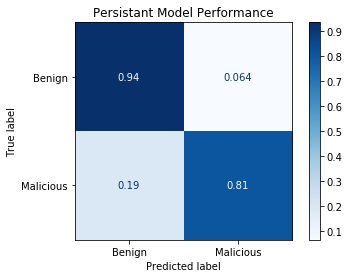

In [25]:
params = model.__dict__
model_params_loc = '/Users/chrismclearnon/Developer/QUB-CSC3032-FYP/src/ml-demo-app/api/ml/featureprocessing/transformers/model_params.json'
data_to_json(params, model_params_loc)

import json
import collections
from scipy import sparse
import matplotlib.pyplot as plt

for k, v in params.items():
    if isinstance(v, list) and v[-1:] == '_':
        params[k] = v.tolist()
        
fitted_date_enc = deserialize(DateEncoder(), json_to_data("", date_enc_loc))
fitted_cat_enc = deserialize(CategoryEncoder(), json_to_data("", cat_enc_loc))
fitted_scaler = DomainFeatureScaler(scaler_loc=scaler_loc, has_fit=True)

new_model = deserialize(SVC(), json_to_data("", model_params_loc))
y_pred=new_model.predict(x_test)

from sklearn.metrics import plot_confusion_matrix
disp = plot_confusion_matrix(new_model, x_test, y_test,
                                 display_labels=['Benign', 'Malicious'],
                                 cmap=plt.cm.Blues,
                                 normalize='true')
disp.ax_.set_title('Persistant Model Performance')
plt.show()

In [26]:
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
from sklearn.model_selection import train_test_split

pipe = Pipeline([
    ('model', SVC(probability=True))
])

svc_search = {
    'model': Categorical([SVC(probability=True)]),
    'model__C': Real(0.01, 100.0, 'log-uniform'),
    'model__kernel': Categorical(['poly', 'rbf']),
}

searchcv = BayesSearchCV(
    SVC(),
    search_spaces = {
        'C': Real(1e-6, 1e+6, prior='log-uniform'),
        'gamma': Real(1e-6, 1e+1, prior='log-uniform'),
        'kernel': Categorical(['poly', 'rbf']),
    },
    n_iter=10,
    cv=cv,
    verbose=5,
    n_jobs=-1
)

def on_step(optim_result):
    score = searchcv.best_score_
    print(f'Best score: {score}')
    if score >= 0.98:
        print('Interrupting!')
        return True
    
import time
start_time = time.time()

searchcv.fit(X_train, Y_train, callback=on_step)

print("--- %s seconds ---" % (time.time() - start_time))

Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Best score: 0.4843283582089552
Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    1.9s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    2.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    0.2s remaining:    0.1s


Best score: 0.8716417910447761
Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.2s finished


Best score: 0.8716417910447761
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Best score: 0.8716417910447761
Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    0.2s remaining:    0.1s


Best score: 0.8716417910447761
Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    0.2s remaining:    0.1s


Best score: 0.8716417910447761
Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Best score: 0.8716417910447761
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Best score: 0.8716417910447761
Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.3s finished


Best score: 0.8716417910447761
Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.3s finished


Best score: 0.8716417910447761
--- 6.424937009811401 seconds ---


In [28]:
y_pred = searchcv.predict(x_test)
print(f'TPR: {tpr(y_test, y_pred)}\nTNR: {tnr(y_test, y_pred)}\nFPR: {fpr(y_test, y_pred)}\nFNR: {fnr(y_test, y_pred)}')
print(f'Best params found: {searchcv.best_params_}')

bayesian_model_loc=date_enc_loc = '/Users/chrismclearnon/Developer/QUB-CSC3032-FYP/src/ml-demo-app/api/ml/models/bayesian_svc_model.json'
data_to_json(searchcv.best_estimator_.__dict__, bayesian_model_loc)

TPR: 0.8078078078078078
TNR: 0.9388379204892966
FPR: 0.06116207951070336
FNR: 0.1921921921921922
Best params found: {'C': 6167.440671107427, 'gamma': 0.11442588109764625, 'kernel': 'rbf'}


'{\n    "decision_function_shape": "ovr",\n    "break_ties": false,\n    "kernel": "rbf",\n    "degree": 3,\n    "gamma": 0.11442588109764625,\n    "coef0": 0.0,\n    "tol": 0.001,\n    "C": 6167.440671107427,\n    "nu": 0.0,\n    "epsilon": 0.0,\n    "shrinking": true,\n    "probability": false,\n    "cache_size": 200,\n    "class_weight": null,\n    "verbose": false,\n    "max_iter": -1,\n    "random_state": null,\n    "_sparse": true,\n    "class_weight_": {\n        "py/numpy.ndarray": {\n            "values": [\n                1.0,\n                1.0\n            ],\n            "dtype": "float64"\n        }\n    },\n    "classes_": {\n        "py/numpy.ndarray": {\n            "values": [\n                0,\n                1\n            ],\n            "dtype": "int64"\n        }\n    },\n    "_gamma": 0.11442588109764625,\n    "support_": {\n        "py/numpy.ndarray": {\n            "values": [\n                18,\n                20,\n                28,\n              

In [29]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

y_scores = searchcv.decision_function(x_test)
p, r, thresholds = precision_recall_curve(y_test, y_scores)

def adjust_classes_to_threshold(y_scores, t):
    return [1 if y >= t else 0 for y in y_scores]

def precision_recall_threshold(p, r, thresholds, t=0.5):
    adjusted_y_pred = adjust_classes_to_threshold(y_scores, t)
    
    print(pd.DataFrame(confusion_matrix(y_test, adjusted_y_pred),
                      columns=['Pred_neg', 'Pred_pos'],
                      index=['neg', 'pos']))
    
    plt.figure(figsize=(8,8))
    plt.title("Precision and Recall curve ^ = current threshold")
    plt.step(r, p, color='b', alpha=0.2,
             where='post')
    plt.fill_between(r, p, step='post', alpha=0.2,
                     color='b')
    plt.ylim([0.5, 1.01]);
    plt.xlim([0.5, 1.01]);
    plt.xlabel('Recall');
    plt.ylabel('Precision');
    
    close_default_clf = np.argmin(np.abs(thresholds-t))
    plt.plot(r[close_default_clf], p[close_default_clf], '^', c='k', markersize=15)

     Pred_neg  Pred_pos
neg       307        20
pos        64       269


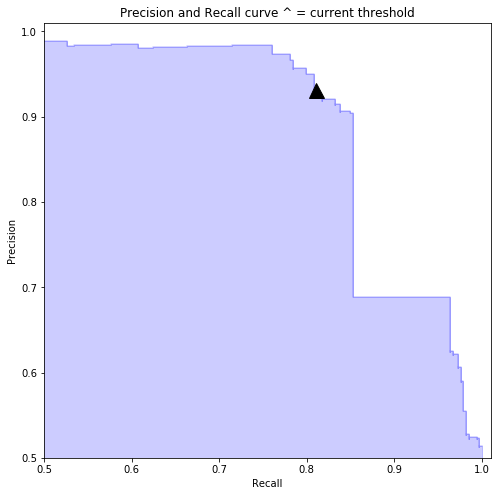

In [30]:
precision_recall_threshold(p, r, thresholds, 0.10)

In [31]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.figure(figsize=(8, 8))
    plt.title("Precision and Recall Scores as a function of the decision threshold")
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.ylabel("Score")
    plt.xlabel("Decision Threshold")
    plt.legend(loc='best')

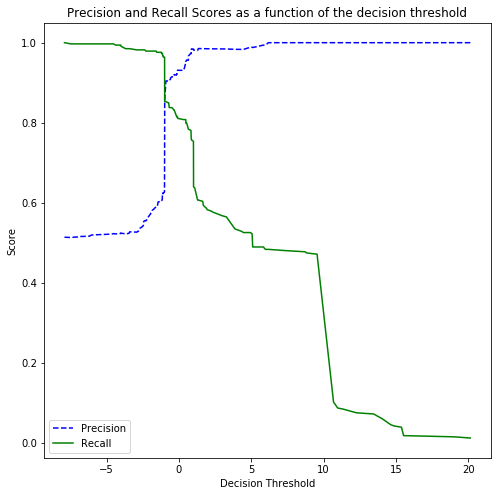

In [32]:
plot_precision_recall_vs_threshold(p, r, thresholds)

In [33]:
from sklearn.metrics import roc_curve, auc

def plot_roc_curve(fpr, tpr, label=None):
    """
    The ROC curve, modified from 
    Hands-On Machine learning with Scikit-Learn and TensorFlow; p.91
    """
    plt.figure(figsize=(8,8))
    plt.title('ROC Curve')
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.005, 1, 0, 1.005])
    plt.xticks(np.arange(0,1, 0.05), rotation=90)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate (Recall)")
    plt.legend(loc='best')


0.9248193147275716


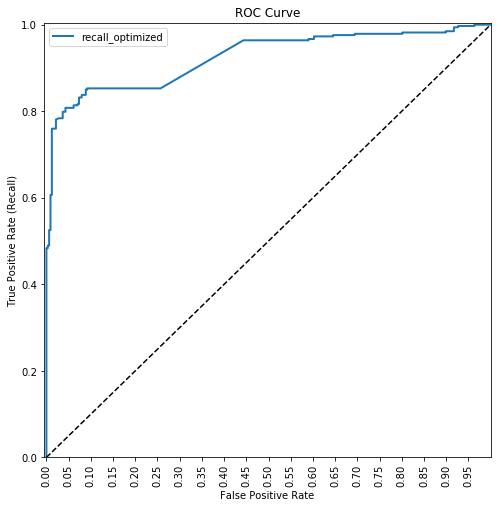

In [34]:
fpr, tpr, auc_thresholds = roc_curve(y_test, y_scores)
print(auc(fpr, tpr)) # AUC of ROC
plot_roc_curve(fpr, tpr, 'recall_optimized')